In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
session = InteractiveSession(config=config)

In [3]:
x = np.linspace(0, 100, 1001)

In [4]:
# 소숫점 첫째자리를 기준으로 반올림 해준다. 데이터 가공상 문제가 생김
x = np.round(x,1)

In [5]:
y = np.sin(x)

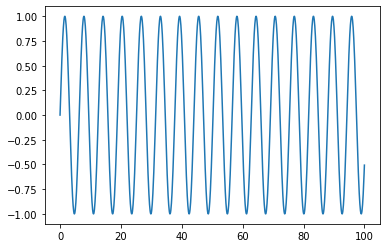

In [6]:
plt.plot(x, y)

In [7]:
df = pd.DataFrame(data = y, index= x, columns=["sine_wave"])

In [8]:
df

,sine_wave
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
99.6,-0.802196
99.7,-0.738582
99.8,-0.667588
99.9,-0.589924


In [9]:
train = df.iloc[:801]
test = df.iloc[801:]

In [10]:
train

,sine_wave
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
79.6,-0.872445
79.7,-0.916876
79.8,-0.952146
79.9,-0.977903


In [11]:
# Scale Data

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(train)

MinMaxScaler()

In [15]:
s_train = scaler.transform(train)

In [16]:
s_test = scaler.transform(test)

In [17]:
# time series Generator

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
length = 50
generator = TimeseriesGenerator(s_train, s_train, length=length, batch_size=2)

In [20]:
s_train[:12]

array([[0.49999843],
       [0.54991547],
       [0.59933376],
       [0.64775952],
       [0.6947089 ],
       [0.73971279],
       [0.78232154],
       [0.82210942],
       [0.85867886],
       [0.89166449],
       [0.92073672],
       [0.94560507]])

In [21]:
generator[0]

(array([[[4.99998429e-01],
         [5.49915469e-01],
         [5.99333755e-01],
         [6.47759515e-01],
         [6.94708895e-01],
         [7.39712793e-01],
         [7.82321544e-01],
         [8.22109415e-01],
         [8.58678860e-01],
         [8.91664489e-01],
         [9.20736720e-01],
         [9.45605073e-01],
         [9.66021072e-01],
         [9.81780726e-01],
         [9.92726571e-01],
         [9.98749240e-01],
         [9.99788555e-01],
         [9.95834132e-01],
         [9.86925483e-01],
         [9.73151620e-01],
         [9.54650167e-01],
         [9.31605983e-01],
         [9.04249320e-01],
         [8.72853515e-01],
         [8.37732266e-01],
         [7.99236491e-01],
         [7.57750829e-01],
         [7.13689791e-01],
         [6.67493618e-01],
         [6.19623889e-01],
         [5.70558902e-01],
         [5.20788899e-01],
         [4.70811163e-01],
         [4.21125057e-01],
         [3.72227028e-01],
         [3.24605649e-01],
         [2.78736736e-01],
 

In [22]:
generator[0]

(array([[[4.99998429e-01],
         [5.49915469e-01],
         [5.99333755e-01],
         [6.47759515e-01],
         [6.94708895e-01],
         [7.39712793e-01],
         [7.82321544e-01],
         [8.22109415e-01],
         [8.58678860e-01],
         [8.91664489e-01],
         [9.20736720e-01],
         [9.45605073e-01],
         [9.66021072e-01],
         [9.81780726e-01],
         [9.92726571e-01],
         [9.98749240e-01],
         [9.99788555e-01],
         [9.95834132e-01],
         [9.86925483e-01],
         [9.73151620e-01],
         [9.54650167e-01],
         [9.31605983e-01],
         [9.04249320e-01],
         [8.72853515e-01],
         [8.37732266e-01],
         [7.99236491e-01],
         [7.57750829e-01],
         [7.13689791e-01],
         [6.67493618e-01],
         [6.19623889e-01],
         [5.70558902e-01],
         [5.20788899e-01],
         [4.70811163e-01],
         [4.21125057e-01],
         [3.72227028e-01],
         [3.24605649e-01],
         [2.78736736e-01],
 

In [23]:
generator[1]

(array([[[5.99333755e-01],
         [6.47759515e-01],
         [6.94708895e-01],
         [7.39712793e-01],
         [7.82321544e-01],
         [8.22109415e-01],
         [8.58678860e-01],
         [8.91664489e-01],
         [9.20736720e-01],
         [9.45605073e-01],
         [9.66021072e-01],
         [9.81780726e-01],
         [9.92726571e-01],
         [9.98749240e-01],
         [9.99788555e-01],
         [9.95834132e-01],
         [9.86925483e-01],
         [9.73151620e-01],
         [9.54650167e-01],
         [9.31605983e-01],
         [9.04249320e-01],
         [8.72853515e-01],
         [8.37732266e-01],
         [7.99236491e-01],
         [7.57750829e-01],
         [7.13689791e-01],
         [6.67493618e-01],
         [6.19623889e-01],
         [5.70558902e-01],
         [5.20788899e-01],
         [4.70811163e-01],
         [4.21125057e-01],
         [3.72227028e-01],
         [3.24605649e-01],
         [2.78736736e-01],
         [2.35078596e-01],
         [1.94067449e-01],
 

In [24]:
import tensorflow as tf

In [25]:
model = tf.keras.models.Sequential()

In [26]:
model.add(tf.keras.layers.SimpleRNN(50, input_shape = (50,1) ))

In [27]:
model.add(tf.keras.layers.Dense(1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam', loss='mse')

In [30]:
model.fit(generator, epochs=4)

Epoch 1/4
376/376 [==============================] - 7s 18ms/step - loss: 0.0081
Epoch 2/4
376/376 [==============================] - 7s 18ms/step - loss: 1.8940e-04
Epoch 3/4
376/376 [==============================] - 7s 18ms/step - loss: 5.6586e-04
Epoch 4/4
376/376 [==============================] - 7s 18ms/step - loss: 1.9515e-05


In [31]:
s_g_test= TimeseriesGenerator(s_test, s_test, length=length, batch_size=1)

In [32]:
predict_test = model.predict(s_g_test)

In [33]:
s_test[-1]

array([0.24681392])

In [34]:
s_g_test[149][-1]

array([[0.24681392]])

In [35]:
true_predict = scaler.inverse_transform(predict_test)

In [36]:
true_predict.shape

(150, 1)

In [37]:
test2=test.drop(test.index[0:length])

In [38]:
test2['predict_test_sine'] = true_predict

In [39]:
test2

,sine_wave,predict_test_sine
85.1,-0.273470,-0.260467
85.2,-0.368131,-0.352549
85.3,-0.459115,-0.440448
85.4,-0.545511,-0.523421
85.5,-0.626456,-0.600854
...,...,...
99.6,-0.802196,-0.789393
99.7,-0.738582,-0.728070
99.8,-0.667588,-0.659158
99.9,-0.589924,-0.583350


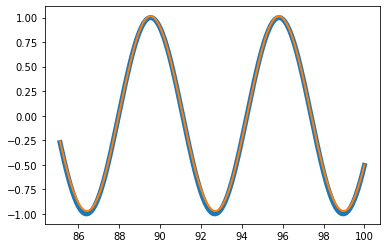

In [40]:
plt.plot(test2.index, test2.sine_wave, linewidth = 5.0)
plt.plot(test2.index, test2.predict_test_sine, linewidth = 2.0)

In [ ]:
s_g_test[0][0].shape

In [50]:
batch = s_test[-length:]

In [65]:
forecast = []
c_batch = batch.reshape((1, length, 1))

for i in range(300):
    c_predict = model.predict(c_batch)[0]
    forecast.append(c_predict)
    c_batch = np.append(c_batch[:,1:,:],[[c_predict]], axis = 1)

In [66]:
forecast = scaler.inverse_transform(forecast)

In [67]:
forecast

array([[-0.41429371],
       [-0.3222055 ],
       [-0.22670978],
       [-0.12833667],
       [-0.03062152],
       [ 0.06720479],
       [ 0.16364863],
       [ 0.25910865],
       [ 0.35032365],
       [ 0.43888949],
       [ 0.5239649 ],
       [ 0.60486395],
       [ 0.6808999 ],
       [ 0.75165086],
       [ 0.81683573],
       [ 0.87383385],
       [ 0.92367599],
       [ 0.96469492],
       [ 0.99587462],
       [ 1.01759262],
       [ 1.02830112],
       [ 1.02840507],
       [ 1.01706381],
       [ 0.99560783],
       [ 0.96364231],
       [ 0.9212414 ],
       [ 0.8701577 ],
       [ 0.80996623],
       [ 0.74184835],
       [ 0.66674354],
       [ 0.58571669],
       [ 0.49932569],
       [ 0.40853209],
       [ 0.31477556],
       [ 0.21836831],
       [ 0.12058945],
       [ 0.02283276],
       [-0.07385308],
       [-0.16826329],
       [-0.25930103],
       [-0.34516131],
       [-0.42553132],
       [-0.49907253],
       [-0.56496994],
       [-0.62296303],
       [-0

In [71]:
forecast_ind = np.arange(100.1, 130.0 ,step = 0.1)

In [72]:
forecast_ind.shape

(300,)

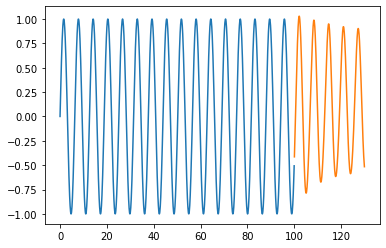

In [73]:
plt.plot(df.index, df['sine_wave'])
plt.plot(forecast_ind, forecast)

In [85]:
model_LSTM = tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(50, input_shape=(50,1)))
model_LSTM.add(tf.keras.layers.Dense(1))

In [86]:
model_LSTM.compile(optimizer='adam', loss='mse')

In [87]:
model_LSTM.fit(generator, epochs = 5)

Epoch 1/5
376/376 [==============================] - 1s 2ms/step - loss: 0.0146
Epoch 2/5
376/376 [==============================] - 1s 2ms/step - loss: 2.7171e-04
Epoch 3/5
376/376 [==============================] - 1s 2ms/step - loss: 1.8937e-04
Epoch 4/5
376/376 [==============================] - 1s 2ms/step - loss: 1.1267e-04
Epoch 5/5
376/376 [==============================] - 1s 2ms/step - loss: 3.3763e-04


In [88]:
forecast_LSTM = []
c_batch = batch.reshape((1, length, 1))

for i in range(300):
    c_predict = model_LSTM.predict(c_batch)[0]
    forecast_LSTM.append(c_predict)
    c_batch = np.append(c_batch[:,1:,:],[[c_predict]], axis = 1)

In [89]:
forecast_LSTM = scaler.inverse_transform(forecast_LSTM)

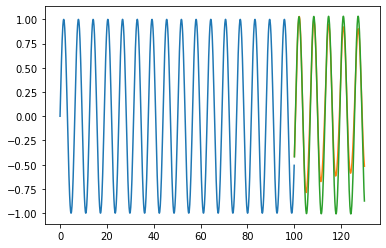

In [90]:
plt.plot(df.index, df['sine_wave'])
plt.plot(forecast_ind, forecast)
plt.plot(forecast_ind, forecast_LSTM)
